In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('C:/Users/farav/OneDrive/Documentos/Python Scripts')

In [3]:
base_gral_senti_fecha = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_gral_senti_fecha.head()

,titular,fecha,diario,sentimiento
0,"""Mirá la ceremonia de inauguración de los Jueg...",2021-07-23,elobse,NEU
1,"""El contrasentido del clásico: Peńarol perdió ...",2021-07-23,elobse,NEU
2,"""Los sueldos de $ 200.000 en el Directorio de ...",2021-07-23,elobse,NEU
3,"""żDónde se podrán ver los Juegos Olímpicos de ...",2021-07-23,elobse,NEU
4,"""Crece interés de argentinos por Montevideo: c...",2021-07-23,elobse,POS


<AxesSubplot:xlabel='diario'>

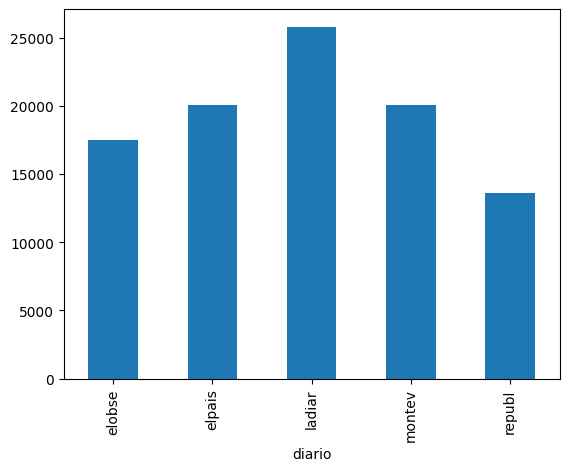

In [4]:
base_gral_senti_fecha.groupby(['diario']).count()['sentimiento'].plot(kind='bar')
# acá tengo el número de titulares por diario.

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='diario', ylabel='sentimiento'>

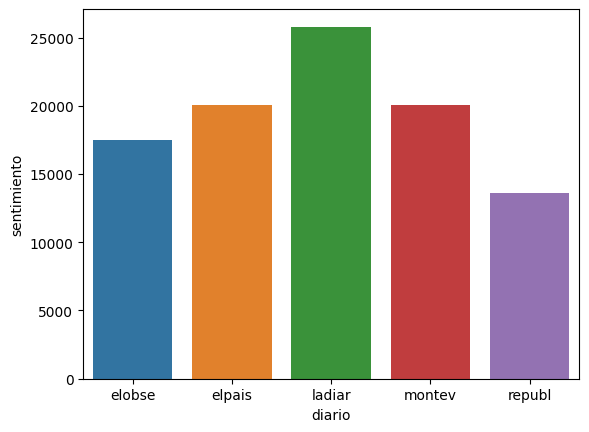

In [6]:
grafico = base_gral_senti_fecha[['sentimiento','diario']].groupby('diario').count()
grafico = grafico.reset_index()
sns.barplot(x='diario', y='sentimiento', data=grafico)

In [7]:
tabla_datos = pd.crosstab(index=base_gral_senti_fecha['sentimiento'], \
                          columns=base_gral_senti_fecha['diario'])
# si saco margins=True me da solo los valores
tabla_datos

diario,elobse,elpais,ladiar,montev,republ
sentimiento,,,,,
NEG,3020,3188,3771,2879,1715
NEU,13047,14962,20602,14975,10974
POS,1401,1869,1417,2174,937


<AxesSubplot:xlabel='sentimiento'>

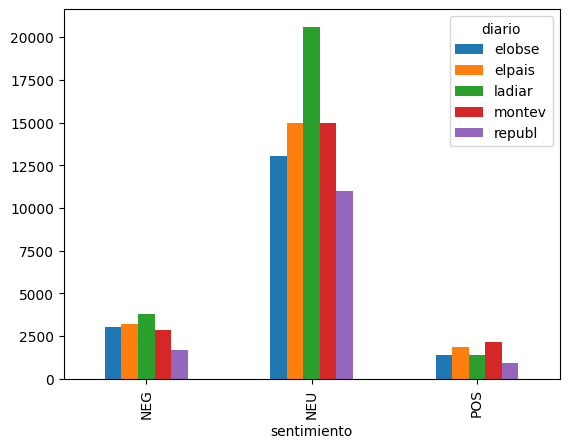

In [8]:
tabla_datos.plot(kind='bar')

<AxesSubplot:xlabel='diario'>

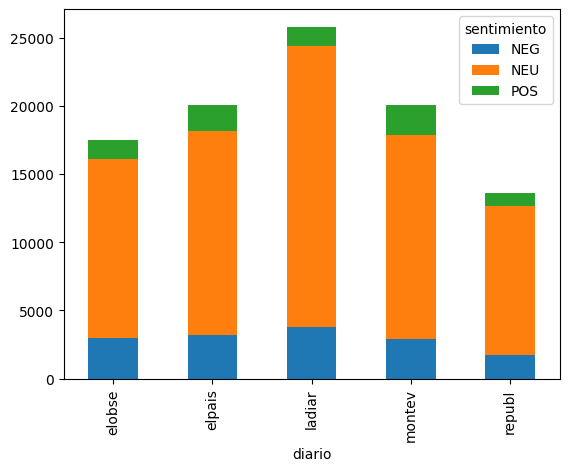

In [9]:
grafico_1 = base_gral_senti_fecha.groupby(['diario', 'sentimiento']).size().reset_index().pivot(columns='sentimiento', index='diario', values=0)
grafico_1.plot(kind='bar', stacked=True)
# size() en pandas devuelve el número de elementos, filas, etc.

In [10]:
# esto lo saqué de: https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/
# Esto muestra porcentajes por diarios de las etiquetas de sentimiento.

pd.crosstab(index=base_gral_senti_fecha['sentimiento'], columns=base_gral_senti_fecha['diario']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

diario,elobse,elpais,ladiar,montev,republ
sentimiento,,,,,
NEG,17.288757,15.924871,14.621946,14.374875,12.586232
NEU,74.690863,74.738998,79.883676,74.770322,80.537208
POS,8.020380,9.336131,5.494378,10.854803,6.876560


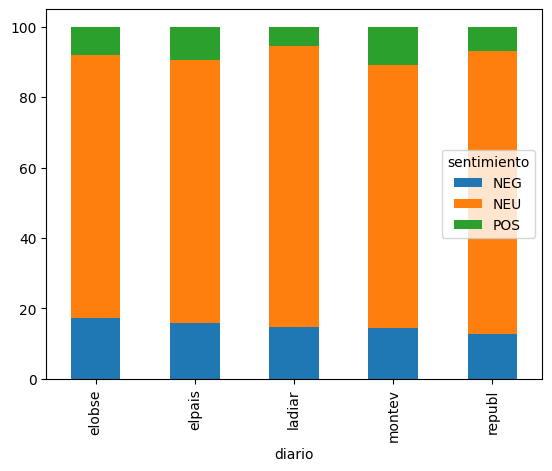

In [11]:
# esto lo saqué de: https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/

plot = pd.crosstab(index=base_gral_senti_fecha['diario'],
            columns=base_gral_senti_fecha['sentimiento']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

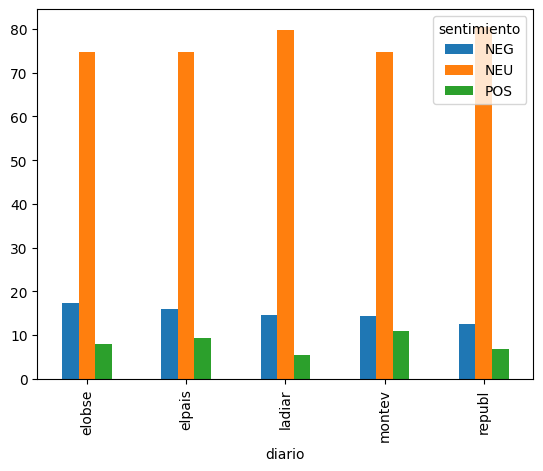

In [12]:
plot = pd.crosstab(index=base_gral_senti_fecha['diario'],
            columns=base_gral_senti_fecha['sentimiento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

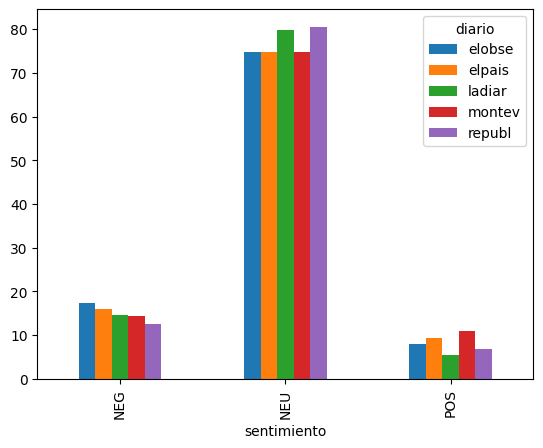

In [13]:
plot = pd.crosstab(index=base_gral_senti_fecha['sentimiento'],
            columns=base_gral_senti_fecha['diario']).apply(lambda r: r/r.sum() *100,
                                              axis=0).plot(kind='bar')

In [14]:
!python -m pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp310-cp310-win_amd64.whl (153 kB)


In [17]:
!python -m pip install nltk

In [19]:
!python -m nltk.downloader all

C:\Users\farav\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\farav\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\farav\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\farav\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\

In [20]:
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [22]:
data = base_gral_senti_fecha['titular']
data.head()

0    "Mirá la ceremonia de inauguración de los Jueg...
1    "El contrasentido del clásico: Peńarol perdió ...
2    "Los sueldos de $ 200.000 en el Directorio de ...
3    "żDónde se podrán ver los Juegos Olímpicos de ...
4    "Crece interés de argentinos por Montevideo: c...
Name: titular, dtype: object

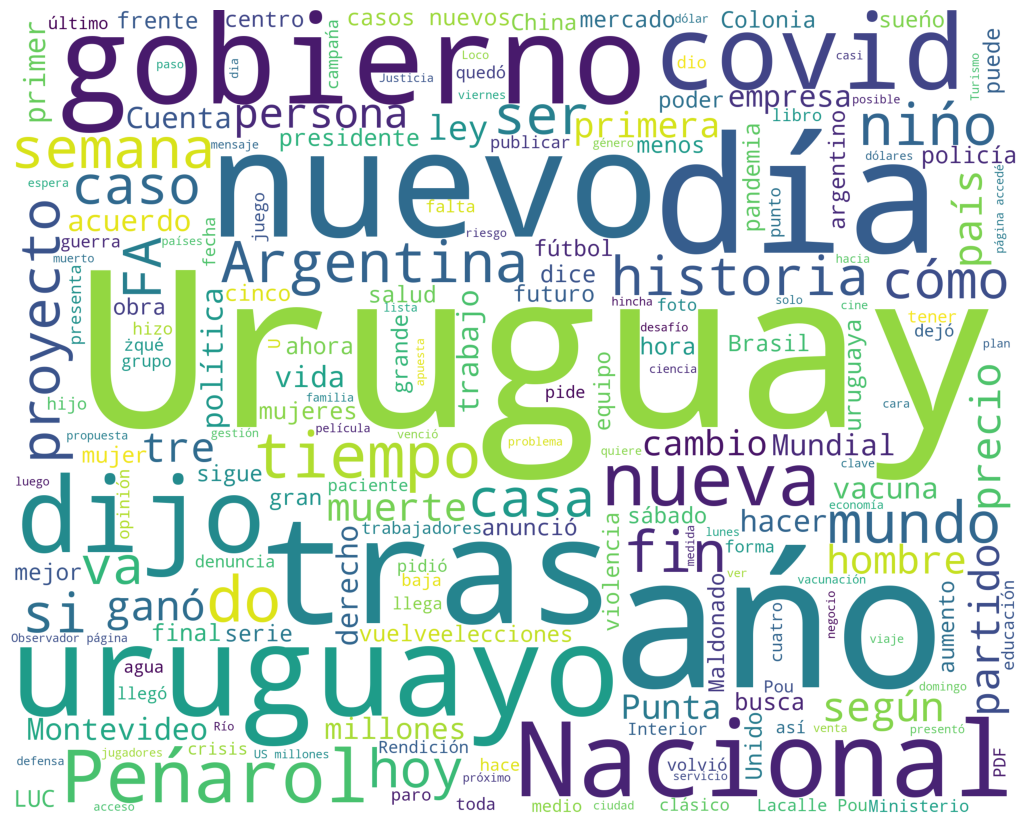

In [23]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    ''' Limpio el texto eliminando hashtags, menciones, links y retweets.
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('¿')
                                and not word.startswith('¡')
                                and not word.startswith('"')
                                and not word.endswith('?')
                                and not word.endswith('!')
                                and not word.endswith('"')
                                and word != '$'
                            ])
    wordcloud = WordCloud(stopwords=stopwords.words("spanish"),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
#print("Palabras positivas")
wordcloud_draw(data,'white')
#print("Palabras negativas")
#wordcloud_draw(train_neg)

In [24]:
data_sent = base_gral_senti_fecha[['titular', 'sentimiento']]

data_sent_pos = data_sent[data_sent['sentimiento'] == 'POS']
data_sent_pos = data_sent['titular']
data_sent_neg = data_sent[data_sent['sentimiento'] == 'NEG']
data_sent_neg = data_sent['titular']
data_sent_neu = data_sent[data_sent['sentimiento'] == 'NEU']
data_sent_neu = data_sent['titular']

Palabras positivas


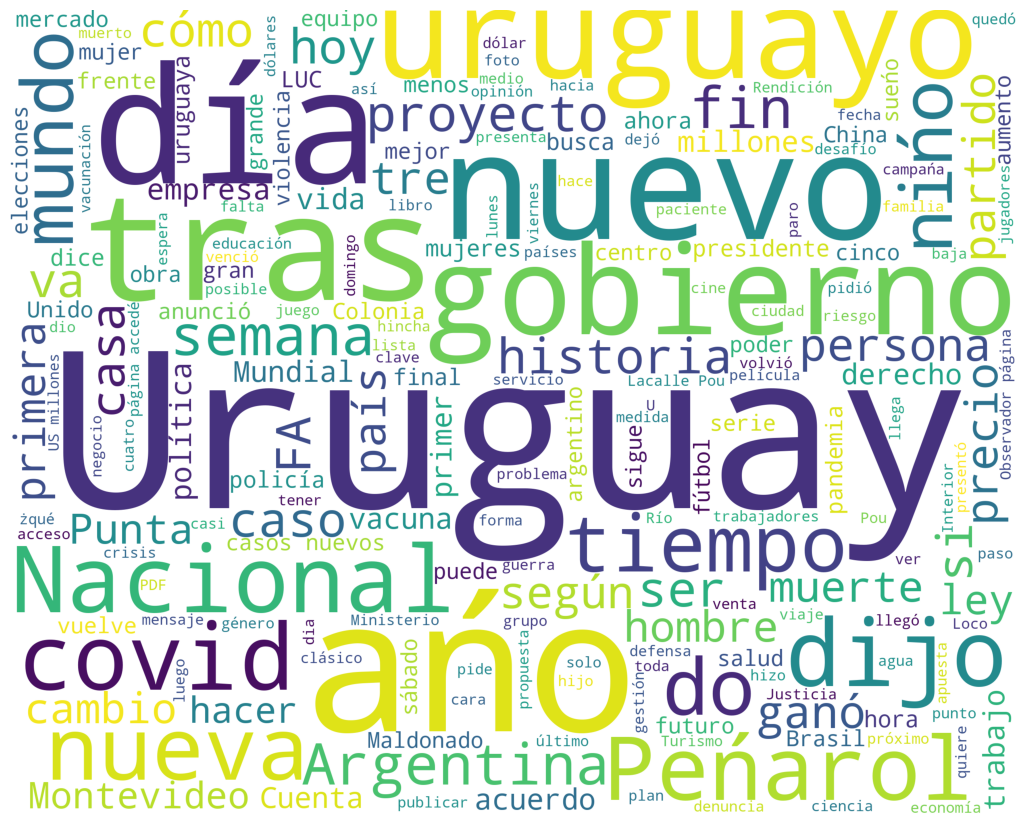

Palabras negativas


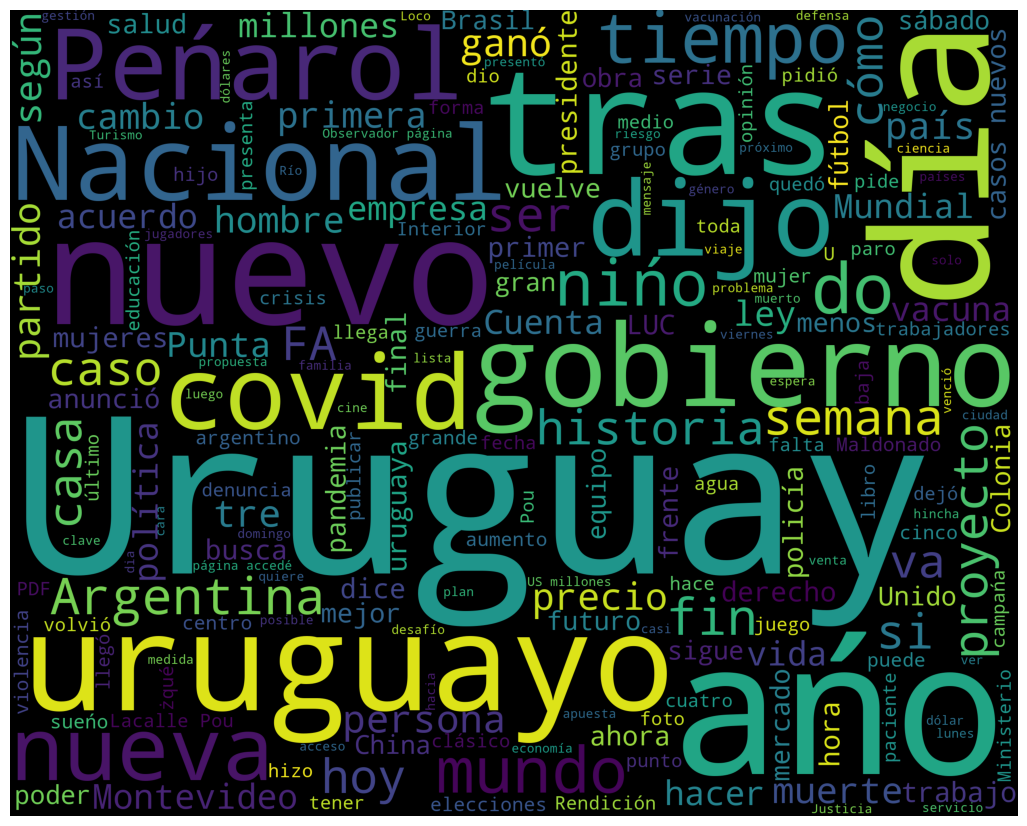

Palabras neutras black


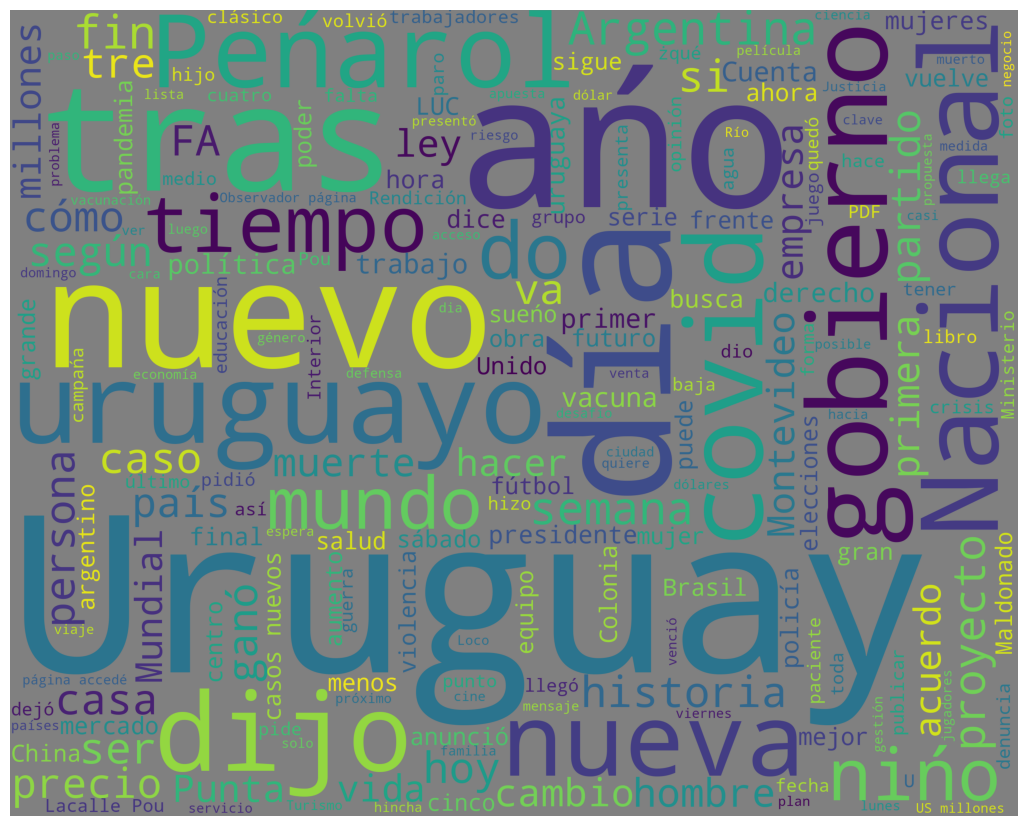

In [25]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    ''' Limpio el texto eliminando hashtags, menciones, links y retweets.
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('¿')
                                and not word.startswith('¡')
                                and not word.startswith('"')
                                and not word.endswith('?')
                                and not word.endswith('!')
                                and not word.endswith('"')
                                and word != '$'
                            ])
    wordcloud = WordCloud(stopwords=stopwords.words("spanish"),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Palabras positivas")
wordcloud_draw(data_sent_pos,'white')
print("Palabras negativas")
wordcloud_draw(data_sent_neg)
print('Palabras neutras', 'black')
wordcloud_draw(data_sent_neu, 'grey')